In [1]:
import json
import matplotlib.pyplot as plt
import copy
import numpy as np
import pandas as pd

# Raw Data Preprocessing

In [3]:
# import business.json to raw_business_data
raw_business_data = [json.loads(line) for line in open('yelp_academic_dataset_business.json', 'r')]

# extract vancouver restaurant information
vancouver_business = []
for i in range(len(raw_business_data)):
    city = raw_business_data[i]['city'].lower()
    state = raw_business_data[i]['state'].lower()
    
    if raw_business_data[i]['categories'] is not None:
        category = raw_business_data[i]['categories'].lower()
    
    if state == 'bc' and ('vancouver' in city):
        if 'restaurants' in category:
            vancouver_business.append(raw_business_data[i])

# collect vancouver restaurant id
vb_id = []
for i in range(len(vancouver_business)):
    if vancouver_business[i]['business_id'] not in vb_id:
        vb_id.append(vancouver_business[i]['business_id'])

# import review.json to raw_reviews_data
raw_reviews_data = [json.loads(line) for line in open('yelp_academic_dataset_review.json', 'r')]

# extract reviews on vancouver business.
vancouver_reviews = []
for i in range(len(raw_reviews_data)):
    if raw_reviews_data[i]['business_id'] in vb_id:
        vancouver_reviews.append(raw_reviews_data[i])

In [4]:
# check total number of vancouver_business and vancouver_reviews
print("The total number of vancouver restaurants data is:", len(vancouver_business))
print("The total number of vancouver reviews data is:", len(vancouver_reviews))

The total number of vancouver business data is: 4748
The total number of vancouver reviews data is: 322241


In [5]:
# create new json files of vancouver business and reviews
with open('vancouver_restaurants_data.json', 'w') as json_outfile:
    json.dump(vancouver_business, json_outfile)
    
with open('vancouver_reviews_data.json', 'w') as json_outfile:
    json.dump(vancouver_reviews, json_outfile)

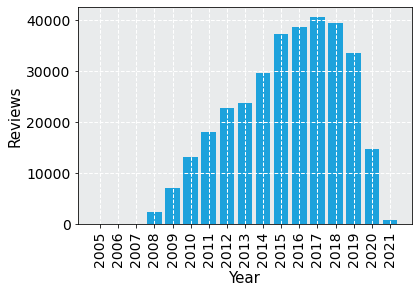

In [6]:
# check the reviews by year
year_count = {}
for i in range(len(vancouver_reviews)):
    year = vancouver_reviews[i]['date'][:4]
    if year not in year_count.keys():
        year_count[year] = 1
    else:
        year_count[year] += 1
        

# plot reviews by year in bar chart
x = list(year_count.keys())
x.sort()
y = list(year_count[x[i]] for i in range(len(x)))


plt.rcParams['axes.facecolor'] = '#E9EBEC' # figure background color to light grey
plt.grid(color = 'white', linestyle = '--', linewidth = 1)
plt.bar(x,y, color = '#1DA2DC')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Reviews', fontsize = 15)

plt.tick_params(labelsize = 14)
plt.xticks(rotation=90)

plt.show()

In [7]:
# filter out 2015 - 2019 vancouver reviews data
v_reviews_filtered = []
year_selected = ['2015', '2016', '2017', '2018', '2019']

for i in range(len(vancouver_reviews)):
    year = vancouver_reviews[i]['date'][:4]
    
    if year in year_selected:
        v_reviews_filtered.append(vancouver_reviews[i])

In [8]:
# check total number of vancouver_reviews during 2015 - 2019
print("The total number of vancouver reviews during 2015 - 2019 is:", len(v_reviews_filtered))

The total number of vancouver reviews during 2015 - 2019 is: 189599


In [9]:
# create new json files of 2015 - 2019 vancouver reviews data
with open('vancouver_review_data2015_2019.json', 'w') as json_outfile:
    json.dump(v_reviews_filtered, json_outfile)

In [10]:
# reviews stars
stars = {'1':0, '2':0, '3':0, '4':0, '5':0}

for i in range(len(v_reviews_filtered)):
    star = v_reviews_filtered[i]['stars']
    
    if star < 2.0:
        stars['1'] += 1
    elif star >= 2.0 and star < 3.0:
        stars['2'] += 1
    elif star >= 3.0 and star < 4.0:
        stars['3'] += 1
    elif star >= 4.0 and star < 5.0:
        stars['4'] += 1
    elif star >= 5.0:
        stars['5'] += 1

'''        
# plot selected period review stars in pie chart
y = stars.values()

explode = (0, 0, 0, 0, 0.1)  # only "explode" the 5-star slice 
plt.figure(figsize = (7,7))
patches, l_text, p_text = plt.pie(y, labels = stars.keys(), explode = explode, autopct = '%.1f%%', \
        shadow = True, colors = ['#1DA2DC', '#9E7CDD', '#DD7C9F', '#EAAB3B', '#6DCA69'], startangle = 90)
# set up font size & color inside of the pie chart
for i in p_text:
    i.set_size(14)
    i.set_color('#252525')    
# set up font size & color ouside of the pie chart
for i in l_text:
    i.set_size(14)
    i.set_color('#252525')    
plt.show()
'''

'        \n# plot selected period review stars in pie chart\ny = stars.values()\n\nexplode = (0, 0, 0, 0, 0.1)  # only "explode" the 5-star slice \nplt.figure(figsize = (7,7))\npatches, l_text, p_text = plt.pie(y, labels = stars.keys(), explode = explode, autopct = \'%.1f%%\',         shadow = True, colors = [\'#1DA2DC\', \'#9E7CDD\', \'#DD7C9F\', \'#EAAB3B\', \'#6DCA69\'], startangle = 90)\n\n# set up font size & color inside of the pie chart\nfor i in p_text:\n    i.set_size(14)\n    i.set_color(\'#252525\')\n    \n# set up font size & color ouside of the pie chart\nfor i in l_text:\n    i.set_size(14)\n    i.set_color(\'#252525\')\n    \nplt.show()\n'

In [11]:
# combine restaurants & reviews for selected period(2015-2019) - adds restaurants information for each review record
reviews_business = copy.deepcopy(v_reviews_filtered)

for i in range(len(v_reviews_filtered)):
    b_id = v_reviews_filtered[i]['business_id']
    
    for j in range(len(vancouver_business)):
        if vancouver_business[j]['business_id'] == b_id:
            for key in vancouver_business[j]:
                if key not in ['name', 'stars', 'review_count']:
                    reviews_business[i][key] = vancouver_business[j][key]
                elif key == 'name':
                    reviews_business[i]['b_name'] = vancouver_business[j][key]
                elif key == 'stars':
                    reviews_business[i]['b_stars'] = vancouver_business[j][key]
                elif key == 'review_count':
                    reviews_business[i]['b_review_count'] = vancouver_business[j][key]                 

In [12]:
with open('reviews_restaurants_2015_2019.json', 'w') as json_outfile:
    json.dump(reviews_business, json_outfile)

In [13]:
# collect user id who has rated vancouver restaurants in selected period(2015 - 2019)
uid_lst = []
for i in range(len(reviews_business)):
    if reviews_business[i]['user_id'] not in uid_lst:
        uid_lst.append(reviews_business[i]['user_id'])

In [14]:
# import user.json to raw_user_data
raw_user_data = [json.loads(line) for line in open('yelp_academic_dataset_user.json', 'r')]

# extract users info who have rated vancouver restaurants in selected period(2015 - 2019)
users_data = []
for i in range(len(raw_user_data)):
    if raw_user_data[i]['user_id'] in uid_lst:
        users_data.append(raw_user_data[i])

In [15]:
# check total number of users in selected period(2015 - 2019)
print("The total number of users who rated vancouver restaurants during 2015-2018 is:", len(users_data))

The total number of users who rated vancouver restaurants during 2015-2018 is: 64794


In [16]:
# create new json files of 2015 - 2019 vancouver reviews data
with open('user_data2015_2019.json', 'w') as json_outfile:
    json.dump(users_data, json_outfile)

In [17]:
# find review_count outliers in users_data
review_count_lst = []
for i in range(len(users_data)):
    review_count_lst.append(users_data[i]['review_count'])
    
q1 = np.quantile(review_count_lst, 0.25)
q3 = np.quantile(review_count_lst, 0.75)
lower_fence = q1 - 1.5 * (q3 - q1)
upper_fence = q3 + 1.5 * (q3 - q1)
print("Q1:", q1)
print("Q3:", q3)
print("lower_fence", lower_fence)
print("upper_fence", upper_fence)

Q1: 3.0
Q3: 30.0
lower_fence -37.5
upper_fence 70.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ccb5a8a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d2eff0700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ccb5a84f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d2eff0ca0>],
 'fliers': [],
 'means': []}

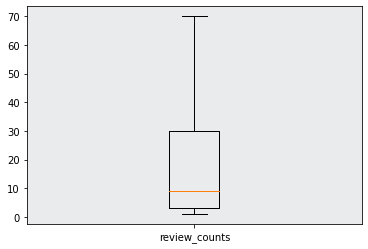

In [18]:
# draw box-plot of review_count 
plt.boxplot(review_count_lst, 0, '', labels = ['review_counts'])

In [19]:
# remove review_count outliers and extract user info whose review_counts is equal to or less than 70
user_filtered = []
for i in range(len(users_data)):
    if users_data[i]['review_count'] <= 70:
        user_filtered.append(users_data[i])

In [20]:
# conbime reviews_business & users - add users information for each review_business record
reviews_business_users = []

for i in range(len(reviews_business)):
    review = []
    u_id = reviews_business[i]['user_id']

    for j in range(len(user_filtered)):
        if user_filtered[j]['user_id'] == u_id:
            review = reviews_business[i]
            for key in user_filtered[j]:
                if key not in ['name', 'review_count', 'useful', 'funny', 'cool', 'friends']:
                    review[key] = user_filtered[j][key]
                elif key == 'review_count':
                    review['u_review_count'] = user_filtered[j][key]
                elif key == 'useful':
                    review['u_useful'] = user_filtered[j][key]
                elif key == 'funny':
                    review['u_funny'] = user_filtered[j][key]
                elif key == 'cool':
                    review['u_cool'] = user_filtered[j][key]
            
            reviews_business_users.append(review)

In [21]:
len(reviews_business_users)

123927

In [22]:
# export reviews_business_users json file
with open('reviews_restaurants_users_final.json', 'w') as json_outfile:
    json.dump(reviews_business_users, json_outfile)

# EDA and Visualization

In [23]:
# import reviews_business_users_final to rbu_data
for line in open('reviews_restaurants_users_final.json', 'r'):
    rbu_data = json.loads(line) 
# create a dataframe of reviews_business_users
df = pd.DataFrame.from_dict(rbu_data, orient='columns')

In [24]:
# preview df
df = df.drop(columns = ['compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', \
                   'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', \
                   'compliment_funny', 'compliment_writer', 'compliment_photos'])

# insert index colum
df['index'] = df.index.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# preview df
pd.set_option('display.max_columns', None)
df.head()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,b_name,address,city,state,postal_code,latitude,longitude,b_stars,b_review_count,is_open,attributes,categories,hours,u_review_count,yelping_since,u_useful,u_funny,u_cool,elite,fans,average_stars
0,0,ucFOnqgaV40oQ2YNyz5ddQ,JHXQEayrDHOWGexs0dCviA,KXCXaF5qimmtKKqnPc_LQA,1.0,0,0,0,Great coffee and pastries. Baristas are excell...,2018-03-03 23:45:25,Thierry,1059 Alberni Street,Vancouver,BC,V6E 1A1,49.284877,-123.122629,4.0,849,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Food, Desserts, Chocolatiers & Shops, Food Del...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-22:0', '...",70,2009-12-11 18:25:05,118,26,21,,3,2.79
1,1,1OsubwE6zKNU1fkBGxOFrQ,vFnYYmtVwcMGyyGesNImVQ,jMz_y_-cWMfiZF7Q5snE6Q,5.0,0,0,0,Ordered the original tonkotsu base ramen and a...,2016-01-30 02:39:22,Ramen Danbo,1333 Robson Street,Vancouver,BC,V6E 2B1,49.287496,-123.128934,4.5,436,1,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","Ramen, Japanese, Noodles, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",68,2013-06-15 04:55:52,34,10,18,,0,3.89
2,2,P320Yt8vFD3yjI34hq-umg,IMfkbLVt_GJfD7zJ9T4fcw,VPqWLp9kMiZEbctCebIZUA,3.0,0,0,0,"Overall is good, is worth the line up I don't ...",2018-09-25 03:22:50,Medina Cafe,780 Richards Street,Vancouver,BC,V6B 3A4,49.280443,-123.117036,4.0,2302,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Bars, Moroccan, Wine Bars, Breakfast & Brunch,...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-15:0', '...",12,2016-05-16 18:49:40,6,1,1,,0,4.67
3,3,fH8hF8bOFGxITdwuvNQVkw,XK_VJRqf_91vCnZigJGfxw,IYyYpXSsD41g14_z-Zdtiw,5.0,0,0,0,"I found this Thai restaurant at yelp! \nSmall,...",2017-02-19 06:31:42,Kin Kao Thai Kitchen,903 Commercial Drive,Vancouver,BC,V5L,49.276356,-123.069692,4.0,143,1,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Thai, Restaurants","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",10,2015-05-25 00:56:03,16,7,7,,0,4.70
4,4,XPjCvOzRsoa-5-Dp3SNrjw,fNTuJcjClg4DXI_J_IcQpQ,KW2svfVHffW_FD8oeJo1xQ,1.0,0,0,0,Apparently it's a requirement to have a TERRIB...,2016-07-03 18:40:42,Something Healthy Wholesome Meals & Juice Bar,660 Abbott Street,Vancouver,BC,V6B 6N7,49.279138,-123.107450,3.5,34,0,"{'RestaurantsAttire': 'u'casual'', 'GoodForKid...","Sandwiches, Restaurants, Juice Bars & Smoothie...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",3,2016-07-03 18:26:57,6,0,1,,0,2.33


In [25]:
# check data shape
df.shape

(123927, 31)

In [26]:
# check if there is Null value and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123927 entries, 0 to 123926
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           123927 non-null  int64  
 1   review_id       123927 non-null  object 
 2   user_id         123927 non-null  object 
 3   business_id     123927 non-null  object 
 4   stars           123927 non-null  float64
 5   useful          123927 non-null  int64  
 6   funny           123927 non-null  int64  
 7   cool            123927 non-null  int64  
 8   text            123927 non-null  object 
 9   date            123927 non-null  object 
 10  b_name          123927 non-null  object 
 11  address         123927 non-null  object 
 12  city            123927 non-null  object 
 13  state           123927 non-null  object 
 14  postal_code     123927 non-null  object 
 15  latitude        123927 non-null  float64
 16  longitude       123927 non-null  float64
 17  b_stars   

In [27]:
# check statistic summary
df.describe(exclude = [object])

,index,stars,useful,funny,cool,latitude,longitude,b_stars,b_review_count,is_open,u_review_count,u_useful,u_funny,u_cool,fans,average_stars
count,123927.000000,123927.000000,123927.000000,123927.000000,123927.000000,123927.000000,123927.000000,123927.00000,123927.000000,123927.000000,123927.000000,123927.000000,123927.000000,123927.000000,123927.000000,123927.000000
mean,61963.000000,3.696410,0.559071,0.175498,0.165815,49.274398,-123.113755,3.73645,261.327701,0.805700,19.775013,17.144295,4.632639,4.864001,0.643984,3.652234
std,35774.787742,1.455262,1.521010,0.858387,0.806925,0.021502,0.033608,0.54110,345.556272,0.395662,18.122615,26.991953,11.690103,12.174667,1.894325,0.901928
min,0.000000,1.000000,0.000000,0.000000,0.000000,49.194305,-123.278011,1.00000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30981.500000,3.000000,0.000000,0.000000,0.000000,49.263677,-123.130851,3.50000,66.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,3.200000
50%,61963.000000,4.000000,0.000000,0.000000,0.000000,49.278608,-123.116585,4.00000,143.000000,1.000000,13.000000,8.000000,1.000000,1.000000,0.000000,3.790000
75%,92944.500000,5.000000,1.000000,0.000000,0.000000,49.284202,-123.100839,4.00000,307.000000,1.000000,30.000000,22.000000,5.000000,5.000000,1.000000,4.250000
max,123926.000000,5.000000,69.000000,69.000000,39.000000,49.395121,-122.948262,5.00000,2302.000000,1.000000,70.000000,1157.000000,867.000000,1112.000000,80.000000,5.000000


In [28]:
# count total number of reviews, business, and users
print("There are totally ", len(df.review_id.unique()), "reviews in the dataset.")
print("There are totally ", len(df.business_id.unique()), "Vancouver restaurants selected in the dataset.")
print("There are totally ", len(df.user_id.unique()), "users selected who rated Vancouver restaurants in the dataset.")

There are totally  123927 reviews in the dataset.
There are totally  3879 Vancouver restaurants selected in the dataset.
There are totally  56124 users selected who rated Vancouver restaurants in the dataset.


In [29]:
# recompute review stars
r_stars = {'1':0, '2':0, '3':0, '4':0, '5':0}

for i in range(len(df.stars)):
    star = df.stars[i]
    
    if star < 2.0:
        r_stars['1'] += 1
    elif star >= 2.0 and star < 3.0:
        r_stars['2'] += 1
    elif star >= 3.0 and star < 4.0:
        r_stars['3'] += 1
    elif star >= 4.0 and star < 5.0:
        r_stars['4'] += 1
    elif star >= 5.0:
        r_stars['5'] += 1
        
'''
# plot selected period review stars in pie chart
y = stars.values()

explode = (0, 0, 0, 0.1, 0.1)  
fig, ax = plt.subplots(figsize=(7, 6))
wedges, texts, autotexts = ax.pie(y, pctdistance = 0.5, \
                                  explode = explode, autopct = '%.1f%%', \
                                  counterclock = False, shadow = True, \
                                  colors = ['#1DA2DC', '#9E7CDD', '#DD7C9F', '#EAAB3B', '#6DCA69'], \
                                  startangle = 90)
ax.legend(wedges, stars.keys(), title="Rating Stars", loc="center right", bbox_to_anchor=(0, 0.5))
plt.setp(autotexts, size=12)
ax.set_title("Reviews Rating Stars")    
plt.show()
'''

'\n# plot selected period review stars in pie chart\ny = stars.values()\n\nexplode = (0, 0, 0, 0.1, 0.1)  \nfig, ax = plt.subplots(figsize=(7, 6))\nwedges, texts, autotexts = ax.pie(y, pctdistance = 0.5,                                   explode = explode, autopct = \'%.1f%%\',                                   counterclock = False, shadow = True,                                   colors = [\'#1DA2DC\', \'#9E7CDD\', \'#DD7C9F\', \'#EAAB3B\', \'#6DCA69\'],                                   startangle = 90)\nax.legend(wedges, stars.keys(), title="Rating Stars", loc="center right", bbox_to_anchor=(0, 0.5))\nplt.setp(autotexts, size=12)\nax.set_title("Reviews Rating Stars")    \nplt.show()\n'

In [30]:
# collect rating stars of each restaurants
rating_b = {b_id : [] for b_id in df.business_id.unique()}

for i in range(len(df)):
    rating_b[df.iloc[i]['business_id']].append(df.iloc[i]['stars'])
    
# collect rating stars of each user
rating_u = {u_id : [] for u_id in df.user_id.unique()}

for i in range(len(df)):
    rating_u[df.iloc[i]['user_id']].append(df.iloc[i]['stars'])

In [31]:
# calculate average rating stars of each restaurants
avgRating_b = {b_id : [] for b_id in df.business_id.unique()}

for key in rating_b:
    avgRating_b[key] = np.mean(rating_b[key])
    
# calculate average rating stars of each user
avgRating_u = {u_id : [] for u_id in df.user_id.unique()}

for key in rating_u:
    avgRating_u[key] = np.mean(rating_u[key])

In [32]:
# recompute average rating star of business stars from df
rb_stars = {'1':0, '2':0, '3':0, '4':0, '5':0}

for key in avgRating_b:
    star = avgRating_b[key]    
    
    if star < 2.0:
        rb_stars['1'] += 1
    elif star >= 2.0 and star < 3.0:
        rb_stars['2'] += 1
    elif star >= 3.0 and star < 4.0:
        rb_stars['3'] += 1
    elif star >= 4.0 and star < 5.0:
        rb_stars['4'] += 1
    elif star >= 5.0:
        rb_stars['5'] += 1

In [33]:
# recompute business stars b_stars
b_stars = {'1':0, '2':0, '3':0, '4':0, '5':0}

for i in range(len(df.b_stars)):
    star = df.b_stars[i]
    
    if star < 2.0:
        b_stars['1'] += 1
    elif star >= 2.0 and star < 3.0:
        b_stars['2'] += 1
    elif star >= 3.0 and star < 4.0:
        b_stars['3'] += 1
    elif star >= 4.0 and star < 5.0:
        b_stars['4'] += 1
    elif star >= 5.0:
        b_stars['5'] += 1

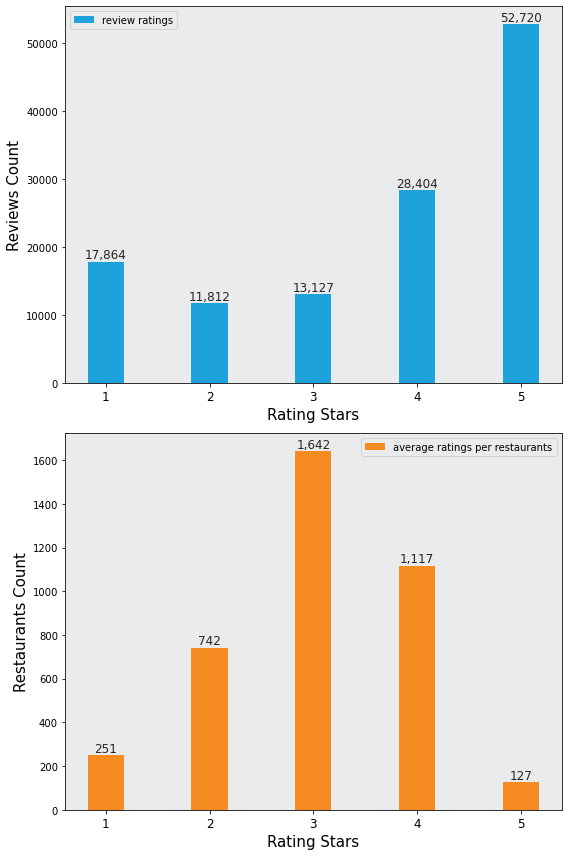

In [37]:
# bar chart of number of restaurants in each rating group
x = np.arange(1,6)  # the label locations
width = 0.35  # the width of the bars
labels = ['1', '2', '3', '4', '5']

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,12))

axs[0].bar(x, list(r_stars.values()), width, color = '#1DA2DC', label='review ratings')
axs[1].bar(x, list(rb_stars.values()), width, color='#F58B21', label='average ratings per restaurants')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_xlabel('Rating Stars', fontsize = 15)
axs[0].set_ylabel('Reviews Count', fontsize = 15)
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, fontsize = 12)
axs[0].legend(fontsize = 10)

axs[1].set_xlabel('Rating Stars', fontsize = 15)
axs[1].set_ylabel('Restaurants Count', fontsize = 15)
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, fontsize = 12)
axs[1].legend(fontsize = 10)

for i in range(2):
    for bar in axs[i].patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        text = f'{bar_value:,}'
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        text_y = bar.get_y() + bar_value
        bar_color = bar.get_facecolor()
        axs[i].text(text_x, text_y, text, ha='center', va='bottom', color='#252525', size=12)

fig.tight_layout()

plt.show()

In [38]:
# collect review counts of each business
rc_b = {b_id : 0 for b_id in df.business_id.unique()}

for i in range(len(df)):
    rc_b[df.iloc[i]['business_id']] += 1
    
# collect review counts of each user
rc_u = {u_id : 0 for u_id in df.user_id.unique()}

for i in range(len(df)):
    rc_u[df.iloc[i]['user_id']] += 1

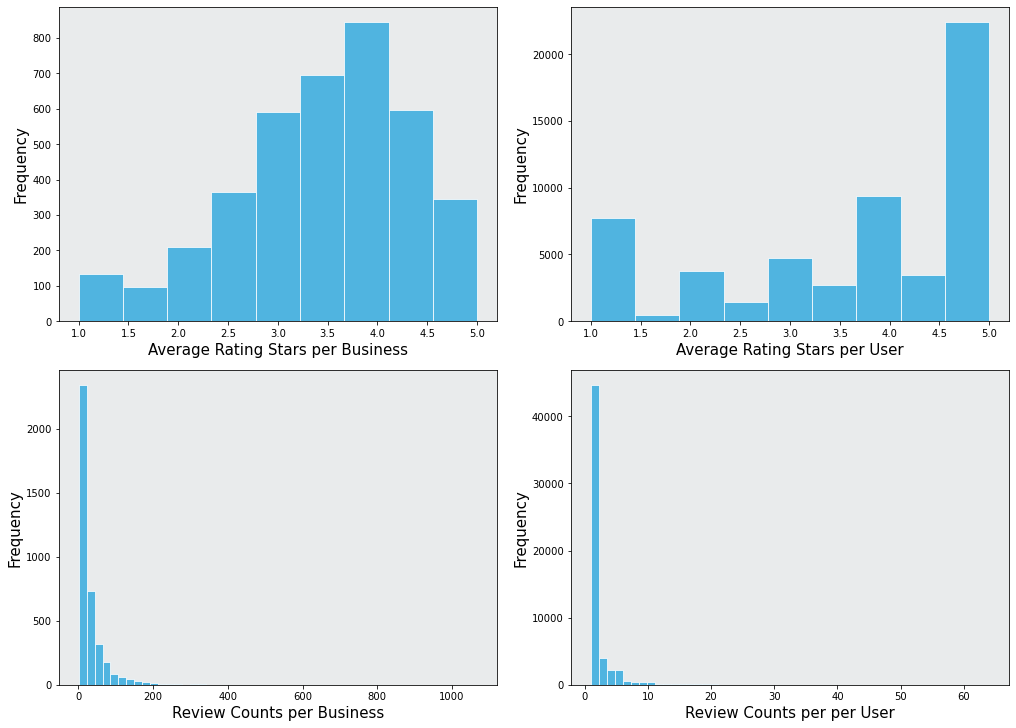

In [39]:
# histograms of average rating stars and review counts of business and users
x1 = list(avgRating_b.values())
y1 = list(avgRating_u.values())
x2 = list(rc_b.values())
y2 = list(rc_u.values())

fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(14,10))


axs[0, 0].hist(x1, bins = 9, facecolor='#1DA2DC', alpha=0.75, edgecolor="white")
axs[0, 0].set_xlabel('Average Rating Stars per Business', fontsize = 15)
axs[0, 0].set_ylabel('Frequency', fontsize = 15)
#axs[0, 0].grid(color = 'white', linestyle = '--', linewidth = 1)

axs[0, 1].hist(y1, bins = 9, facecolor='#1DA2DC', alpha=0.75, edgecolor="white")
axs[0, 1].set_xlabel('Average Rating Stars per User', fontsize = 15)
axs[0, 1].set_ylabel('Frequency', fontsize = 15)
#axs[0, 1].grid(color = 'white', linestyle = '--', linewidth = 1)

axs[1, 0].hist(x2, bins = 50, facecolor='#1DA2DC', alpha=0.75, edgecolor="white")
axs[1, 0].set_xlabel('Review Counts per Business', fontsize = 15)
axs[1, 0].set_ylabel('Frequency', fontsize = 15)
#axs[1, 0].grid(color = 'white', linestyle = '--', linewidth = 1)

axs[1, 1].hist(y2, bins = 50, facecolor='#1DA2DC', alpha=0.75, edgecolor="white")
axs[1, 1].set_xlabel('Review Counts per per User', fontsize = 15)
axs[1, 1].set_ylabel('Frequency', fontsize = 15)
#axs[1, 1].grid(color = 'white', linestyle = '--', linewidth = 1)

plt.show()

### Spearmans Correlation 

In [40]:
# Spearmans correllation between b_stars and b_review_count
from scipy.stats import pearsonr
from scipy.stats import spearmanr

business_df = df.drop_duplicates(subset = 'business_id', keep = 'first')

x = business_df.b_stars.values
y = business_df.b_review_count.values

rho, pval = spearmanr(x, y)
print('rho: %.4f' % rho)
print('p-value:', pval)
#print('Spearmans correlation: %.3f' % corr)
#plt.scatter(x, y)
#plt.show()

rho: 0.1762
p-value: 2.0143488506368219e-28


In [41]:
# Spearmans correllation between stars and user_review_count
x = df.stars.values
y = df.u_review_count.values


rho, pval = spearmanr(x, y)
print('rho: %.4f' % rho)
print('p-value:', pval)
#print('Spearmans correlation: %.3f' % corr)
#plt.scatter(x, y)
#plt.show()

rho: 0.0361
p-value: 5.4947687518025285e-37


In [42]:
# Spearmans correllation between stars and b_stars
x = df.stars.values
y = df.b_stars.values

rho, pval = spearmanr(x, y)
print('rho: %.4f' % rho)
print('p-value:', pval)
#print('Spearmans correlation: %.3f' % corr)
#plt.scatter(x, y)
#plt.show()

rho: 0.3814
p-value: 0.0


In [43]:
# Spearmans correllation between stars and users' average_stars 
x = df.stars.values
y = df.average_stars.values

rho, pval = spearmanr(x, y)
print('rho: %.4f' % rho)
print('p-value:', pval)
#print('Spearmans correlation: %.3f' % corr)
#plt.scatter(x, y)
#plt.show()

rho: 0.5506
p-value: 0.0


In [44]:
# Spearmans correllation between b_stars and user_review_count 
x = df.b_stars.values
y = df.u_review_count.values

rho, pval = spearmanr(x, y)
print('rho: %.4f' % rho)
print('p-value:', pval)
#print('Spearmans correlation: %.3f' % corr)
#plt.scatter(x, y)
#plt.show()

rho: 0.0503
p-value: 3.126520171540593e-70


In [45]:
# Spearmans correllation between b_stars and b_review_count 
x = df.b_stars.values
y = df.b_review_count.values

rho, pval = spearmanr(x, y)
print('rho: %.4f' % rho)
print('p-value:', pval)
#print('Spearmans correlation: %.3f' % corr)
#plt.scatter(x, y)
#plt.show()

rho: 0.2835
p-value: 0.0


### Other Visualization

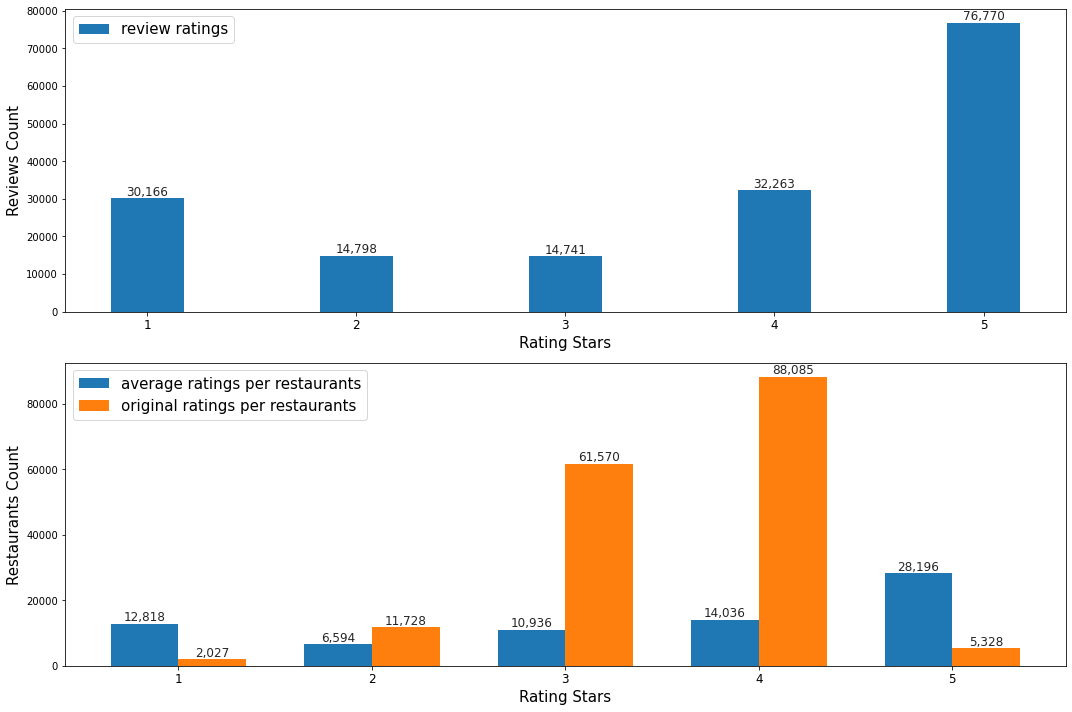

In [41]:
# bar chart of number of restaurants in each rating group
x = np.arange(1,6)  # the label locations
width = 0.35  # the width of the bars
labels = ['1', '2', '3', '4', '5']

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

axs[0].bar(x, list(r_stars.values()), width, label='review ratings')
axs[0].set_xlabel('Rating Stars', fontsize = 15)
axs[0].set_ylabel('Reviews Count', fontsize = 15)
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, fontsize = 12)
axs[0].legend(fontsize = 15)


rects1 = axs[1].bar(x - width/2, list(rb_stars.values()), width, label='average ratings per restaurants')
rects2 = axs[1].bar(x + width/2, list(b_stars.values()), width, label='original ratings per restaurants')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[1].set_xlabel('Rating Stars', fontsize = 15)
axs[1].set_ylabel('Restaurants Count', fontsize = 15)
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, fontsize = 12)
axs[1].legend(fontsize = 15)

for i in range(2):
    for bar in axs[i].patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        text = f'{bar_value:,}'
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        text_y = bar.get_y() + bar_value
        bar_color = bar.get_facecolor()
        axs[i].text(text_x, text_y, text, ha='center', va='bottom', color='#252525', size=12)

fig.tight_layout()

plt.show()

In [97]:
# Number of restaurants in each rating group
labels = list(np.sort(df.b_stars.unique()))
openR = {stars : 0 for stars in labels}
closeR = {stars : 0 for stars in labels}

for i in range(len(df)):
    if df.iloc[i]['is_open'] == 1:
        openR[df.iloc[i]['b_stars']] += 1
    else:
        closeR[df.iloc[i]['b_stars']] += 1

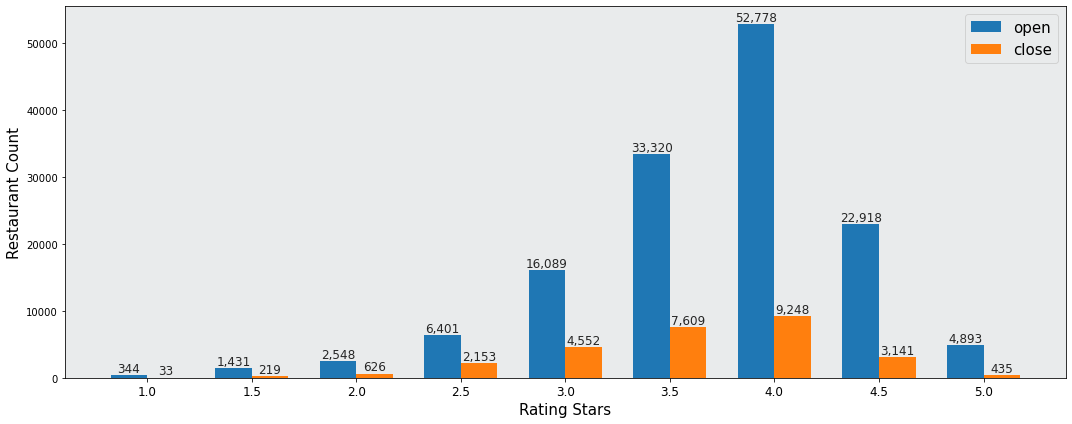

In [126]:
# bar chart of number of restaurants in each rating group
x = np.arange(len(df.b_stars.unique()))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width/2, list(openR.values()), width, label='open')
rects2 = ax.bar(x + width/2, list(closeR.values()), width, label='close')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Rating Stars', fontsize = 15)
ax.set_ylabel('Restaurant Count', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12)
ax.legend(fontsize = 15)

#ax.tick_label(rects1, padding=3)
#ax.tick_label(rects2, padding=3)
for bar in ax.patches:
    # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    text = f'{bar_value:,}'
    # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() is where the bar starts so we add the height to it.
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='#252525', size=12)

fig.tight_layout()

plt.show()